In [1]:
import pandas as pd
import pickle

import os
import numpy as np
import sys
import gensim
import matplotlib.pyplot as plt
sys.path.append(r'C:\Users\aspit\Git\MHDLab-Projects\Energy Storage\nlp_utils')

%matplotlib inline

from nlp_utils import gensim_utils, sklearn_utils, fileio

data_folder = r'C:\Users\aspit\Git\MHDLab-Projects\Energy Storage\data'
db_path = os.path.join(data_folder, 'nlp_search3.db')

df_text = fileio.load_df(db_path)

# df = df.sample(500, random_state=42)

# text = df['processed_text'].values
texts = df_text['processed_text'].values

import gensim

texts = [t.split() for t in texts]
bigram = gensim.models.Phrases(texts, threshold=20, min_count=10)
bigram_mod = gensim.models.phrases.Phraser(bigram)

texts_bigram = [bigram_mod[doc] for doc in texts]

texts = [" ".join(t) for t in texts_bigram]

from sklearn.feature_extraction.text import CountVectorizer

# maxx_features = 2**12
vectorizer = CountVectorizer(max_features=None, min_df=2, max_df = 0.9)
X = vectorizer.fit_transform(texts)

feature_names = vectorizer.get_feature_names()

In [7]:
df_text

,processed_text,language,index,title,raw_text,journal,DOI,url,searchterm,Year,prob,logprob
ID,,,,,,,,,,,,
0,thermal phase change material application late...,en,0,review on thermal energy storage with phase ch...,latent heat storage system phase change materi...,renewable & sustainable energy reviews,10.1016/J.RSER.2007.10.005,https://econpapers.repec.org/article/eeerensus...,Thermal Energy Storage,2009,1.523630e-07,-15.697
1,thermal phase change material heat transfer an...,en,1,review on thermal energy storage with phase ch...,thermal energy storage general phase change ma...,applied thermal engineering,10.1016/S1359-4311(02)00192-8,https://ci.nii.ac.jp/naid/80015725667,Thermal Energy Storage,2003,1.148085e-07,-15.980
2,electrical system critical electrical technolo...,en,2,progress in electrical energy storage system a...,electrical energy storage technologies station...,progress in natural science,10.1016/J.PNSC.2008.07.014,http://promexico.me/Rubenius/WhitePapers/sdart...,Thermal Energy Storage,2009,9.852062e-08,-16.133
3,phase change material application latent heat ...,en,3,a review on phase change energy storage materi...,latent heat storage one efficient ways storing...,energy conversion and management,10.1016/J.ENCONMAN.2003.09.015,https://www.infona.pl/resource/bwmeta1.element...,Thermal Energy Storage,2004,6.839268e-08,-16.498
4,solar engineering thermal process fundamental ...,en,4,solar engineering of thermal processes,fundamentals solar radiation selected heat tra...,nan,nan,http://ci.nii.ac.jp/ncid/BA25372541,Thermal Energy Storage,1980,6.102392e-08,-16.612
...,...,...,...,...,...,...,...,...,...,...,...,...
25219,underground pumped hydroelectric uphs program ...,en,25219,underground pumped hydroelectric storage uphs ...,argonne national laboratory underground pumped...,nan,10.2172/5512239,http://www.osti.gov/servlets/purl/5512239,Pumped Hydro Energy Storage,1979,6.473000e-13,-28.066
25222,evaluation advanced hydraulic turbomachinery u...,en,25222,evaluation of advanced hydraulic turbomachiner...,high head large capacity turbomachinery needed...,nan,10.2172/5079875,https://www.osti.gov/scitech/servlets/purl/507...,Pumped Hydro Energy Storage,1979,6.345000e-13,-28.086
25223,study certain economic aspect turbomachinery u...,en,25223,study of certain economic aspects of turbomach...,economics underground pumped hydroelectric sto...,nan,10.2172/7078705,http://www.osti.gov/scitech/biblio/7078705-stu...,Pumped Hydro Energy Storage,1979,6.345000e-13,-28.086


In [2]:

with open('anchor_tech.txt') as f:
    anchor_tech = f.read().splitlines()

# with open('anchor_storage.txt') as f:
#     anchor_storage = f.read().splitlines()


# anchors = [*anchor_tech, *anchor_storage]
anchors = anchor_tech

anchors = [i.split() for i in anchors]
anchors = [i[0] if len(i) == 1 else i for i in anchors ]
# anchors = [i[0] for i in anchors ]

anchors


['supercapacitor',
 'smes',
 'lead_acid',
 'lithium_ion',
 'redox_flow',
 'pumped_hydro',
 ['compressed_air', 'advanced_adiabatic', 'diabatic'],
 'laes',
 'flywheel',
 'hydrogen',
 ['methanol', 'ammonia', 'p2g'],
 'sensible_heat',
 'latent_heat',
 'thermochemical',
 ['heat_pump', 'ptes']]

In [3]:

from corextopic import corextopic as ct

# n_layers = int(len(anchor)*2)
n_layers = len(anchors) + 5

topic_model = ct.Corex(n_hidden=n_layers)  # Define the number of latent (hidden) topics to use.
topic_model.fit(X, words=feature_names, docs=None, anchors=anchors, anchor_strength=5)

In [4]:
topic_words = []

topics = topic_model.get_topics()
for topic_n,topic in enumerate(topics):
    words,mis = zip(*topic)
    topic_words.append(", ".join(words))

topic_keywords = pd.Series(topic_words, name='topic words')
topic_keywords.to_csv('output/topic_keywords.csv')


In [8]:
top_docs = []
for topic_n,topic in enumerate(top_docs):
    words,mis = zip(*topic)
    top_docs.append(words)

top_docs

[]

In [82]:



s_a = pd.Series(anchors, name = 'anchor words')

df = pd.concat([s_a, topic_keywords], axis = 1)
df

,anchor words,topic words
0,supercapacitor,"supercapacitor, device, hybrid, charge, capaci..."
1,smes,"smes, superconducting, coil, superconducting_m..."
2,lead_acid,"technology, lead_acid, future, battery, develo..."
3,lithium_ion,"electrode, lithium_ion, electrochemical, speci..."
4,redox_flow,"flexible, redox_flow, electronic, solid_state,..."
5,pumped_hydro,"pumped_hydro, electricity, wind, generation, g..."
6,"[compressed_air, advanced_adiabatic, diabatic]","compressed_air, caes, advanced_adiabatic, pres..."
7,laes,"increase, lower, higher, decrease, reduced, re..."
8,flywheel,"flywheel, control, controller, converter, roto..."
9,hydrogen,"hydrogen, fuel_cell, electrolyzer, electrolysi..."


In [12]:
topic_model.get_topics()

[[('supercapacitor', 0.6374713551809056),
  ('device', 0.14916564868736226),
  ('specific_capacitance', 0.09852836609470093),
  ('capacitance', 0.07988617374625691),
  ('flexible', 0.04942410497261784),
  ('asymmetric_supercapacitor', 0.04451520088918274),
  ('assembled', 0.03523357217939775),
  ('hierarchical', 0.03463923939119807),
  ('electronic', 0.03390454012655896),
  ('deliver', 0.026503860281309473)],
 [('smes', 0.1686989981057972),
  ('superconducting', 0.2550239963939545),
  ('coil', 0.16595440434367986),
  ('superconducting_magnetic', 0.11599850424904246),
  ('magnet', 0.10794960591481652),
  ('magnetic_field', 0.08599774906116418),
  ('superconductor', 0.07943596064037779),
  ('magnetic', 0.06428772199304751),
  ('conductor', 0.05098705228735629),
  ('superconducting_magnet', 0.04969388907997227)],
 [('system', 0.14940212146886023),
  ('power', 0.14924932856915063),
  ('load', 0.07187737863356151),
  ('lead_acid', 0.012824055139245514),
  ('operation', 0.05197854150822339),

In [10]:
titles = df_text['title']

top_docs = topic_model.get_top_docs()
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    docs = [str(titles[d])[0:100] for d in docs]
    topic_str = str(topic_n+1)+': ' + str(topic_words[topic_n]) + '\n\n'+',\n'.join(docs) + '\n'
    print(topic_str)

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices
1: supercapacitor, device, specific_capacitance, capacitance, flexible, asymmetric_supercapacitor, assembled, hierarchical, electronic, deliver

facile synthesis of nitrogen and oxygen co doped clews of carbon nanobelts for supercapacitors with ,
a comparative study of supercapacitive performances of nickel cobalt layered double hydroxides coate,
a robust 2d porous carbon nanoflake cathode for high energy power density zn ion hybrid supercapacit,
freestanding 3d graphene nickel encapsulated nitrogen rich aligned bamboo like carbon nanotubes for ,
strategies for control of a battery supercapacitor system in an electric vehicle,
enhanced aging model for supercapacitors taking into account power cycling application to the sizing,
free standing layered graphene monoliths for long life supercapacitor,
advanced cu0 5co0 5se2 nanosheets and mxene electrodes for high performance asymmetric supercapacito,
prussian bl

In [84]:

# Train successive layers
tm_layer2 = ct.Corex(n_hidden=7)
tm_layer2.fit(topic_model.labels)

tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels)
# %%
from corextopic import vis_topic as vt
G = vt.vis_hierarchy([topic_model, tm_layer2], column_label=feature_names, max_edges=300, prefix='output-multianchor')


weight threshold is 0.000000 for graph with max of 140.000000 edges 
non-isolated nodes,edges 26 23
non-isolated nodes,edges 26 20
Couldn't find 'force.html' file for visualizing d3 output


In [85]:
doc_topic_prob = topic_model.p_y_given_x
doc_topic_prob

array([[1.00000000e-06, 1.00000000e-06, 8.07243687e-01, ...,
        9.75014115e-01, 8.67052779e-02, 7.41620865e-04],
       [1.00000000e-06, 1.00000000e-06, 9.99998510e-01, ...,
        8.93587716e-01, 3.64793547e-03, 5.14211115e-02],
       [9.99999000e-01, 1.17140227e-05, 1.22043455e-01, ...,
        9.69306253e-01, 3.78608990e-03, 5.16458959e-03],
       ...,
       [1.00000000e-06, 1.00000000e-06, 9.04189125e-01, ...,
        6.57774215e-05, 7.00021063e-03, 5.12277644e-02],
       [1.00000000e-06, 1.00000000e-06, 9.99999000e-01, ...,
        2.68782147e-01, 9.99999000e-01, 7.41872352e-04],
       [1.00000000e-06, 1.34382863e-05, 9.99999000e-01, ...,
        6.10038164e-01, 3.66492393e-03, 9.99998551e-01]])

In [86]:
import xarray as xr
n_topics = doc_topic_prob.shape[1]
n_docs = doc_topic_prob.shape[0]

da = xr.DataArray(doc_topic_prob, coords= {'topic': range(n_topics), 'id' : df_text.index.values}, dims = ['id', 'topic'])
da

<xarray.DataArray (id: 17091, topic: 20)>
array([[1.00000000e-06, 1.00000000e-06, 8.07243687e-01, ...,
        9.75014115e-01, 8.67052779e-02, 7.41620865e-04],
       [1.00000000e-06, 1.00000000e-06, 9.99998510e-01, ...,
        8.93587716e-01, 3.64793547e-03, 5.14211115e-02],
       [9.99999000e-01, 1.17140227e-05, 1.22043455e-01, ...,
        9.69306253e-01, 3.78608990e-03, 5.16458959e-03],
       ...,
       [1.00000000e-06, 1.00000000e-06, 9.04189125e-01, ...,
        6.57774215e-05, 7.00021063e-03, 5.12277644e-02],
       [1.00000000e-06, 1.00000000e-06, 9.99999000e-01, ...,
        2.68782147e-01, 9.99999000e-01, 7.41872352e-04],
       [1.00000000e-06, 1.34382863e-05, 9.99999000e-01, ...,
        6.10038164e-01, 3.66492393e-03, 9.99998551e-01]])
Coordinates:
  * topic    (topic) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * id       (id) object '0' '1' '2' '3' '4' ... '25222' '25223' '25227' '25231'

In [87]:
%matplotlib inline

(array([3.010e+02, 4.151e+03, 5.785e+03, 4.835e+03, 1.680e+03, 2.790e+02,
        5.000e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([0.01618048, 0.09456237, 0.17294426, 0.25132615, 0.32970805,
        0.40808994, 0.48647183, 0.56485372, 0.64323562, 0.72161751,
        0.7999994 ]),
 <a list of 10 Patch objects>)

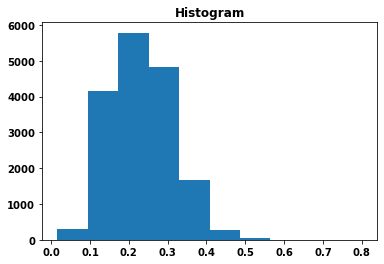

In [88]:
da.mean('topic').plot.hist()

(array([5., 3., 4., 2., 3., 1., 1., 0., 0., 1.]),
 array([0.06986237, 0.12447011, 0.17907786, 0.23368561, 0.28829336,
        0.34290111, 0.39750886, 0.45211661, 0.50672435, 0.5613321 ,
        0.61593985]),
 <a list of 10 Patch objects>)

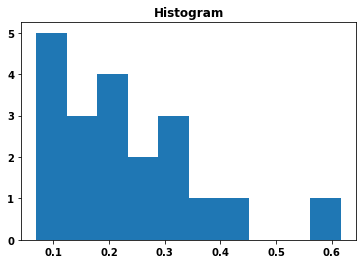

In [89]:
da.mean('id').plot.hist()

In [90]:
da.mean('topic')

<xarray.DataArray (id: 17091)>
array([0.19348373, 0.14197411, 0.2057467 , ..., 0.16859875, 0.46238409,
       0.27881241])
Coordinates:
  * id       (id) object '0' '1' '2' '3' '4' ... '25222' '25223' '25227' '25231'

In [91]:
da.sum('topic')

<xarray.DataArray (id: 17091)>
array([3.86967457, 2.83948212, 4.11493403, ..., 3.37197504, 9.2476819 ,
       5.57624813])
Coordinates:
  * id       (id) object '0' '1' '2' '3' '4' ... '25222' '25223' '25227' '25231'

In [92]:
#Normalize so each topic has total probability one (what does this do in combination with below?)
theta_ij = da/da.sum('id')

#Then normalize so each document has total probability 1
gamma_di = theta_ij/theta_ij.sum('topic')


gamma_i = (1/n_docs)*gamma_di.sum('id')

gamma_di_sub = gamma_di - gamma_i



In [93]:
from nlp_utils import gensim_utils

sigma = gensim_utils.calc_cov(gamma_di_sub.values)

da_sigma = xr.DataArray(sigma, coords = {'topic_i': range(n_topics), 'topic_j': range(n_topics)}, dims = ['topic_i', 'topic_j'])

da_sigma

<xarray.DataArray (topic_i: 20, topic_j: 20)>
array([[ 2.02991691e+02, -7.86070837e+01, -9.74930849e-01,
         1.09942949e+02,  6.13820703e+01, -3.36417012e+01,
        -3.05613075e+01, -1.97562795e+01, -3.28710092e+01,
        -2.57853007e+01, -2.42931132e+01, -4.42808832e+01,
        -4.51593134e+01, -2.85784810e+01, -3.41619960e+01,
        -1.97989499e+01,  4.65159257e+01,  8.44716575e+00,
         2.33645420e+01, -3.41739949e+01],
       [-7.86070837e+01,  6.26173869e+02, -4.31400667e+01,
        -7.87130244e+01, -5.72440272e+01, -5.75116609e+01,
        -5.32443478e+01, -2.74065069e+00,  2.17895968e+01,
        -4.83165352e+01, -4.76299688e+01, -5.64543764e+01,
        -7.72162786e+01, -4.99252804e+01, -5.75294990e+01,
         2.02715600e+00, -3.11667296e+01,  8.84243160e+01,
        -5.00066782e+01,  5.10312698e+01],
       [-9.74930849e-01, -4.31400667e+01,  1.26055380e+02,
         1.87858729e-01,  7.25316485e-01,  6.77225737e+00,
        -8.39593529e+00, -2.38421187e+00, -1.53227851e+01,
         2.77315565e+00,  1.08458486e+01, -1.72747670e+01,
        -2.36792205e+01, -9.73460619e+00, -9.85646977e+00,
         1.25617646e+01, -9.65344341e+00, -8.29941025e+00,
...
         1.49363068e+01, -2.74723811e-02, -2.40077936e+01,
        -2.62905898e+01, -1.73273766e+01, -5.10292122e-01,
        -2.00451668e+01, -2.11655102e+01, -1.83862703e+01,
        -1.69578312e+01, -2.37441485e+01, -2.83994996e+01,
        -3.07888681e+00,  1.32925719e+01,  9.69767999e+01,
        -8.77455377e+00, -5.06235847e+00],
       [ 2.33645420e+01, -5.00066782e+01,  7.29452390e+00,
         3.56239685e+01,  1.86413737e+01,  1.97275277e+00,
        -1.01476242e+01,  8.91642731e-01, -2.31612556e+01,
        -7.56943939e+00,  4.44249614e-01, -7.36817903e+00,
        -1.02261560e+01, -2.55195251e+00, -5.78194205e+00,
        -9.31344500e+00,  1.76109169e+01, -8.77455377e+00,
         4.46453829e+01, -1.55881272e+01],
       [-3.41739949e+01,  5.10312698e+01, -1.85002580e+01,
        -4.72391219e+01, -3.96311950e+01,  9.80850373e+00,
        -5.54753205e+00,  6.03046258e+00,  2.55094865e+01,
        -1.88775472e+01, -1.70830958e+01,  2.00757837e+01,
         6.38719002e-01, -1.56555891e+01,  1.13997245e+00,
         1.40490736e+01, -3.43228145e+01, -5.06235847e+00,
        -1.55881272e+01,  1.23398363e+02]])
Coordinates:
  * topic_i  (topic_i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * topic_j  (topic_j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [94]:
import networkx as nx 
G = nx.Graph() 

for topic_i in da_sigma.coords['topic_i'].values:
    for topic_j in da_sigma.coords['topic_j'].values:
        weight = da_sigma.sel(topic_i=topic_i, topic_j=topic_j).item()
        if  weight > 0.1: 
            if topic_i != topic_j:
                G.add_edge(topic_i,topic_j, weight=weight)

# topic_keywords = df_topickeywords[df_topickeywords.columns[0:6]].apply(", ".join, axis= 1)
topic_keywords = df['topic words']

for node in G.nodes:
    G.nodes[node]['disp_text'] = topic_keywords[node].replace(',', '\n')
    G.nodes[node]['size'] = 20

#%%

print('Writing graph to disk')

nx.write_gexf(G, 'output/G.gexf')

Writing graph to disk
